# Day 14 Workout - Data Prep

## Skewness
The lc_small.csv dataset conains actual loans given by Lending Club. Print the skewness of each feature.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
loans = pd.read_csv('data/lc_small.csv')

In [5]:
skewed_cols = loans.select_dtypes(np.number).skew()
skewed_cols

loan_status_numeric       -2.320589
loan_amnt                  0.799593
int_rate                   0.930093
installment                1.007838
total_pymnt                1.693445
total_rec_prncp            1.898846
total_rec_int              2.539680
total_rec_late_fee        12.106651
annual_inc                 5.845586
acc_now_delinq            24.010477
delinq_2yrs                6.552969
inq_last_6mths             1.751501
mths_since_last_delinq     0.460044
mths_since_last_record    -0.536699
open_acc                   1.461296
pub_rec                    4.595778
revol_bal                  9.690942
revol_util                 0.118710
tot_coll_amt              16.587656
tot_cur_bal                2.524677
total_acc                  1.008800
total_rev_hi_lim           5.961364
dti                       29.282342
dtype: float64

As you can see, the loan_status_numeric feature is negatively skewed. Determine the best method to correct the skewness and save the corrected version as a new feature in the DataFrame.

In [6]:
print((loans.loan_status_numeric ** 2).skew())
print((loans.loan_status_numeric ** 3).skew())
print((np.exp(loans.loan_status_numeric)).skew())

loans['loan_status_numeric_cubed'] = loans.loan_status_numeric ** 3

-1.381329048616435
-0.5285139736917764
0.623719998988759


Correct the skewness of the annual_inc feature and retain the corrected version in the DataFrame.

In [7]:
print(np.sqrt(loans.annual_inc).skew()) #square root
print(np.cbrt(loans.annual_inc).skew()) #cubed root
print(np.log1p(loans.annual_inc).skew()) # log

loans['annual_inc_cubedroot'] = np.cbrt(loans.annual_inc)

1.6588852049276634
0.8922255467580033
-4.159577456855563


Show the histograms to both variables before and after the correction for skewness

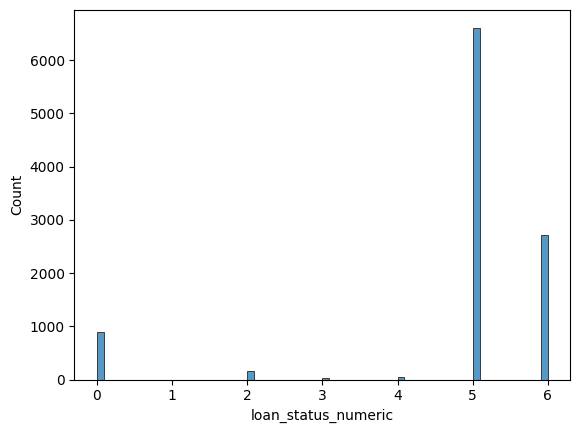

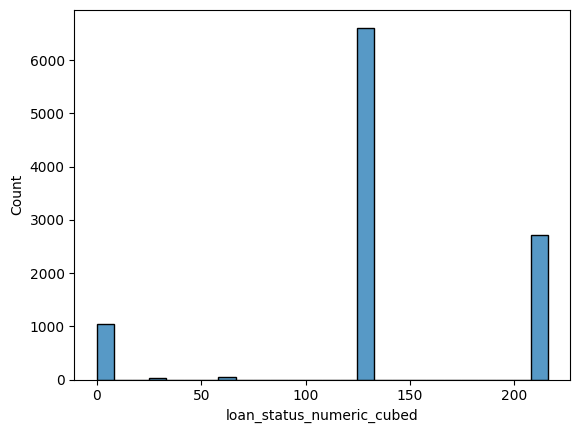

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(loans['loan_status_numeric']);
plt.show()
sns.histplot(loans['loan_status_numeric_cubed']);
plt.show()

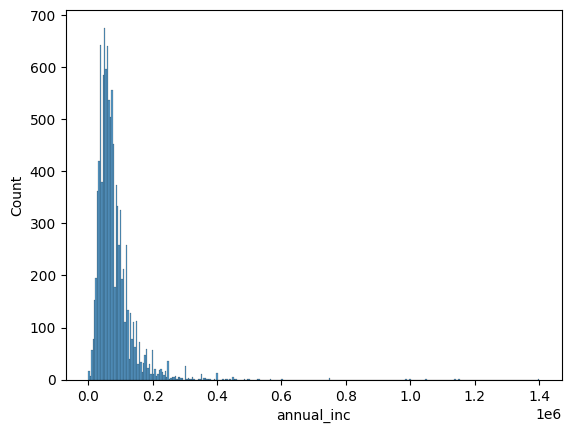

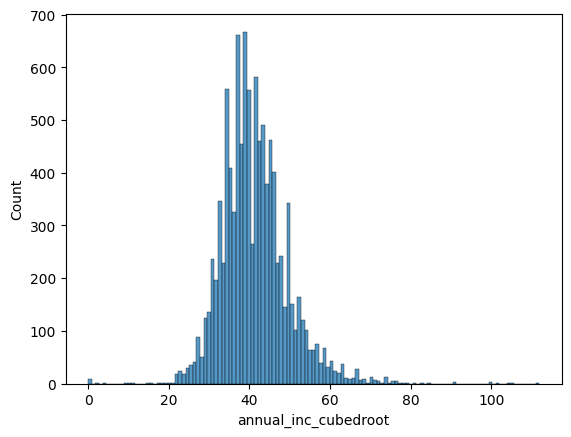

In [9]:
sns.histplot(loans['annual_inc']);
plt.show()
sns.histplot(loans['annual_inc_cubedroot']);
plt.show()

## Outliers

Create a function that will analyze the outliers of a specific column using Tukey's method. For example, return the theoretical min, the outliers under the min, the theoretical max, and the outliers over the max.

In [38]:
def get_outlier_minmax(col):
  if pd.api.types.is_numeric_dtype(col):
    
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    min = q1 - (1.5 * (q3 - q1))
    max = q3 + (1.5 * (q3 - q1))
    min_count = (col < min).sum()
    max_count = (col > max).sum()
  else:
    return np.nan, np.nan, np.nan, np.nan
  
  return min, min_count, max, max_count


In [39]:
get_outlier_minmax(loans.annual_inc)

(-27500.0, 0, 168500.0, 566)

Create a function that will replace outliers with the appropriate theoretical min or max for an entire DataFrame.

In [44]:
def replace_outliers(df):
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            #print(col)
            q1 = df[col].quantile(.25)
            q3 = df[col].quantile(.75)
            min = q1 - (1.5 * (q3 - q1))
            max = q3 + (1.5 * (q3 - q1))
            
            if len(df[df[col] < min]) > 0 or len(df[df[col] > max]) > 0:
                df.loc[df[col] < min, col] = min  # Change all values below min to min
                df.loc[df[col] > max, col] = max  # Change all values above max to max
            else:
                continue  # If there are no outliers, skip to the next column
    return df
        


In [45]:
loans2 = replace_outliers(loans)

<Axes: ylabel='annual_inc'>

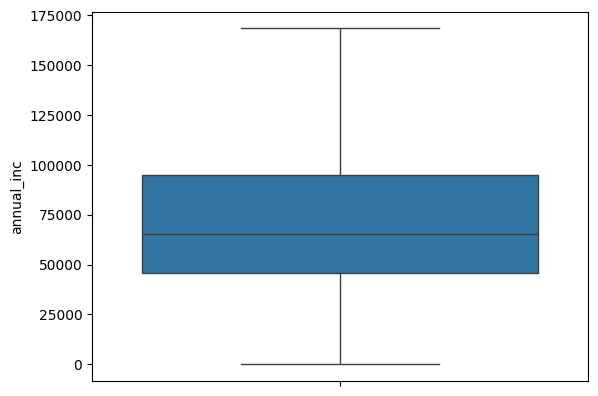

In [46]:
sns.boxplot(loans2.annual_inc)